In [23]:
import pandas as pd

# Assuming your dataset is in a CSV file
df = pd.read_csv(r"C:\Users\english\Desktop\data\loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0 

In [25]:

df.fillna(0, inplace=True)

In [26]:
# Remove duplicate rows
df = df.drop_duplicates()

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Count Plots for Categorical Variables

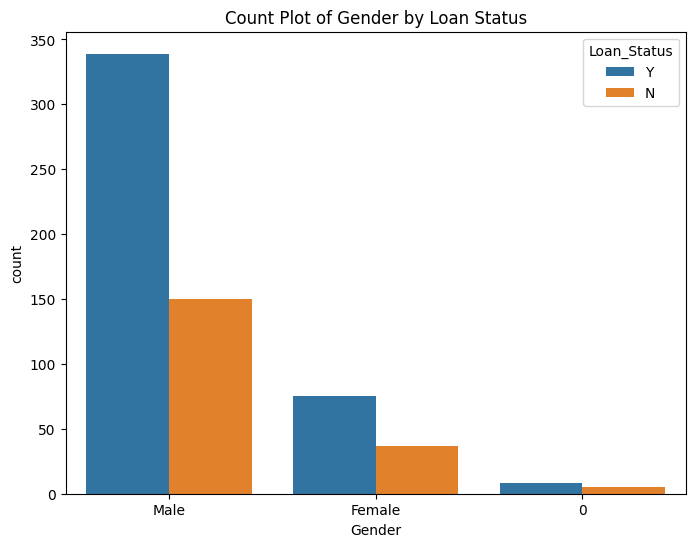

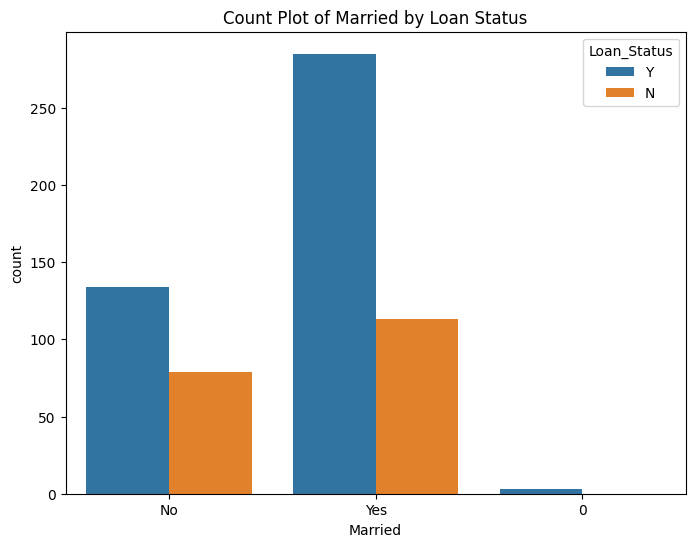

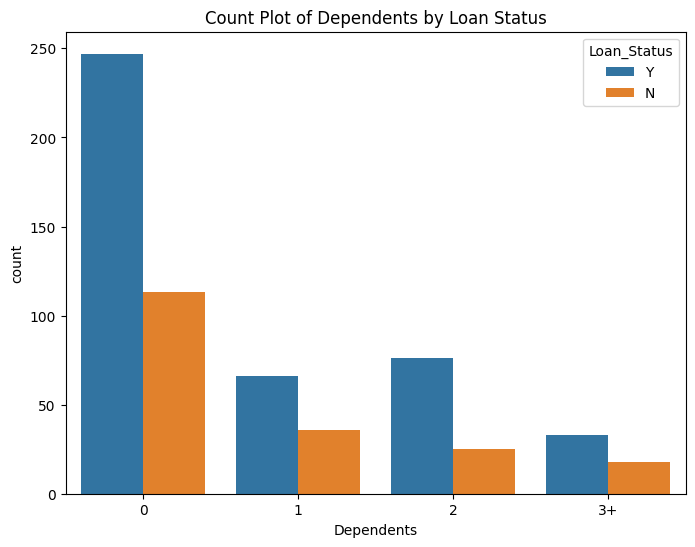

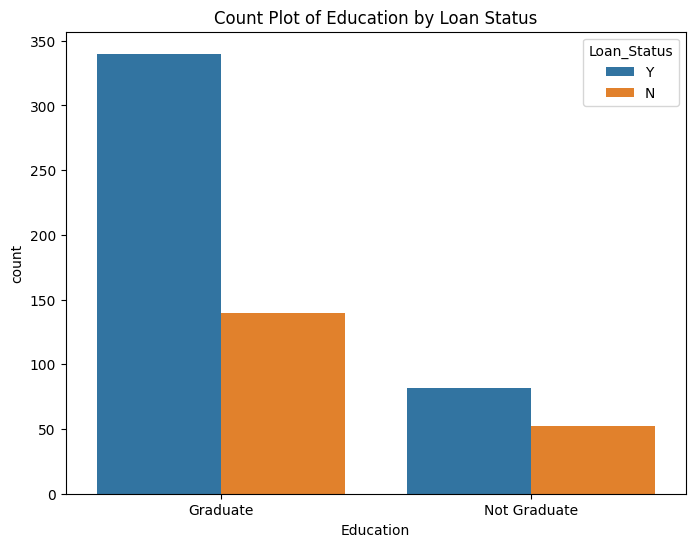

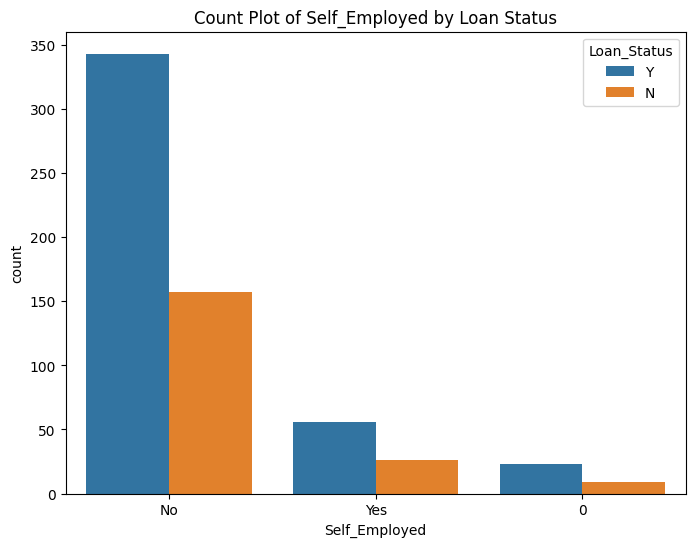

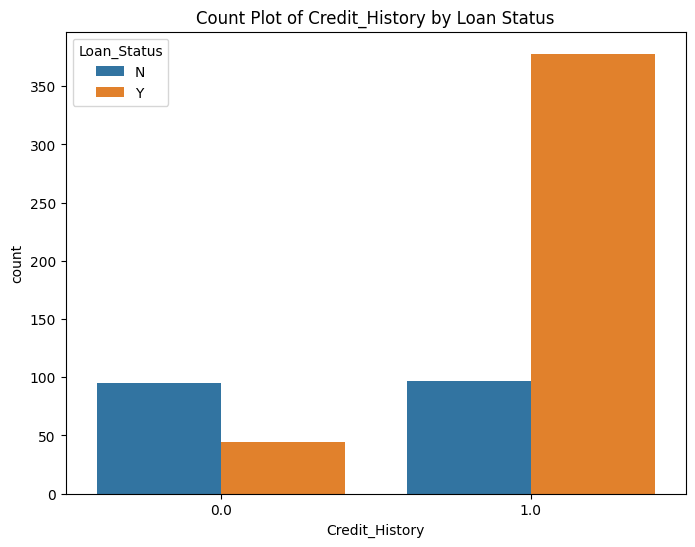

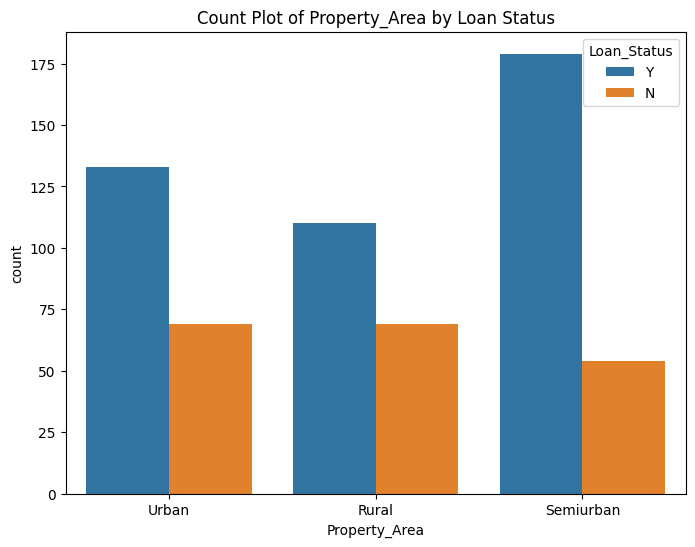

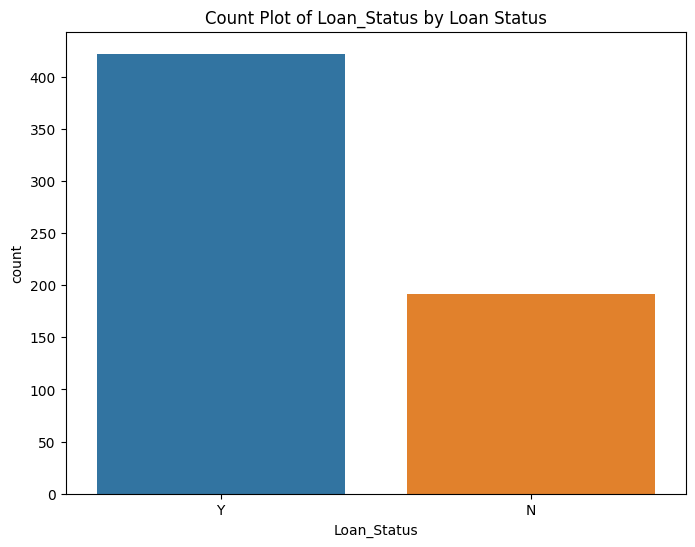

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, hue='Loan_Status')
    plt.title(f'Count Plot of {column} by Loan Status')
    plt.show()


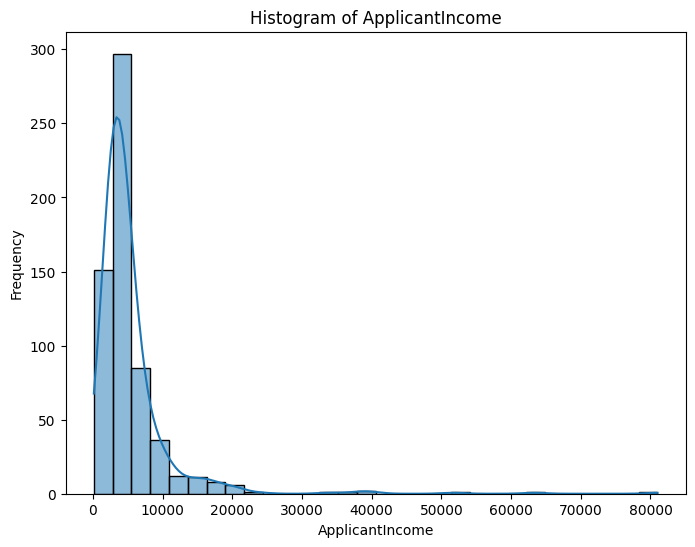

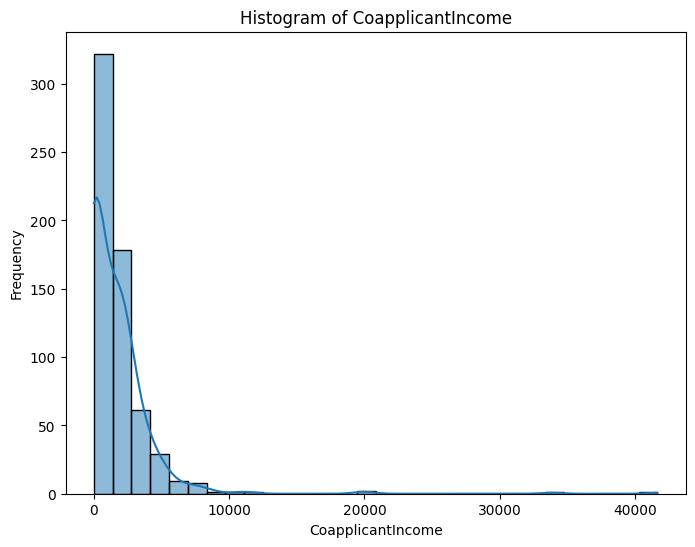

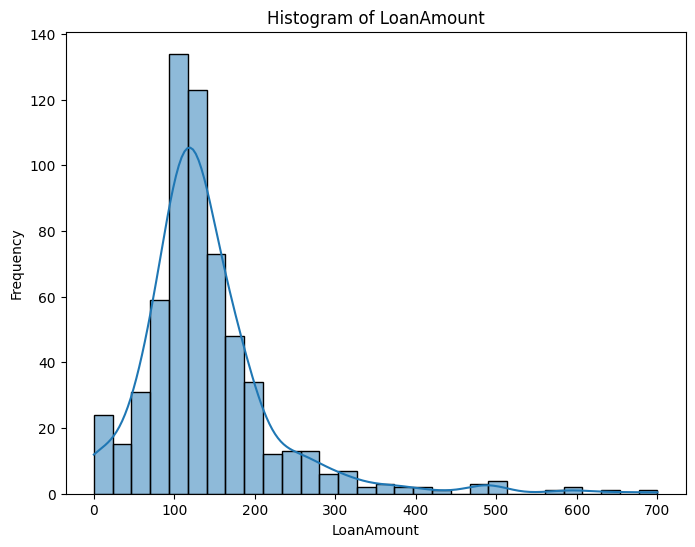

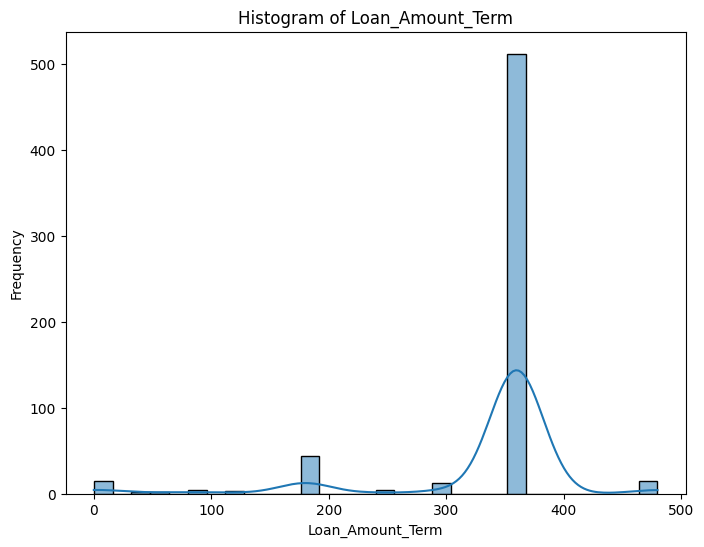

In [29]:
# histogram of the numerical variables
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Check the outliers

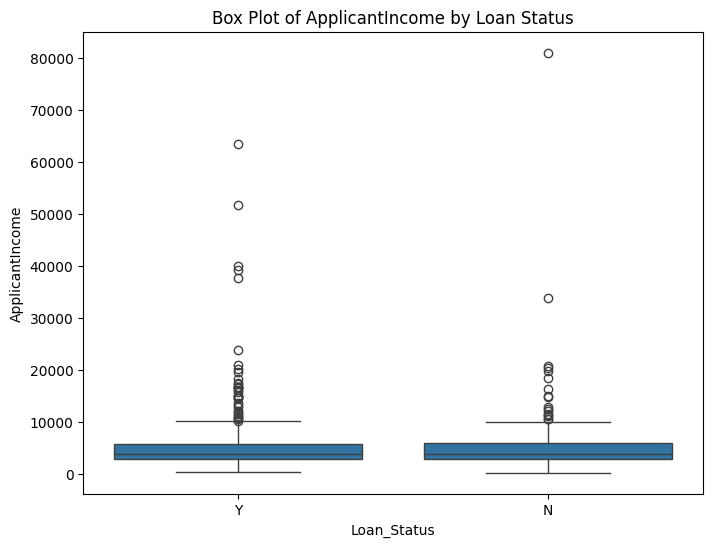

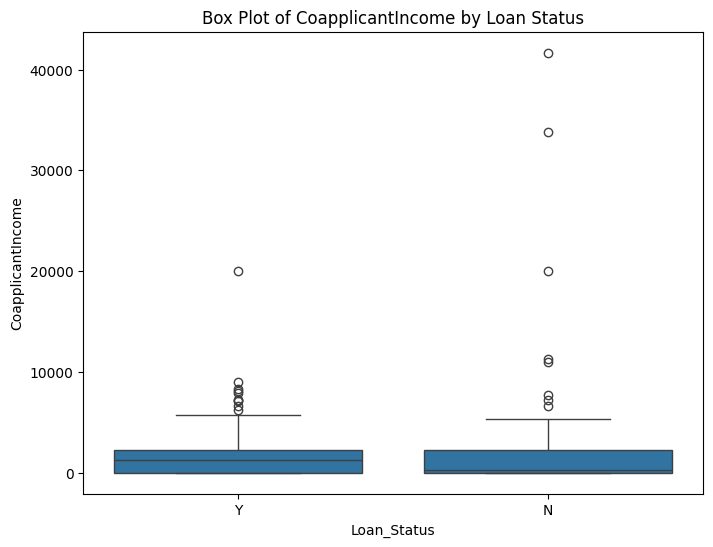

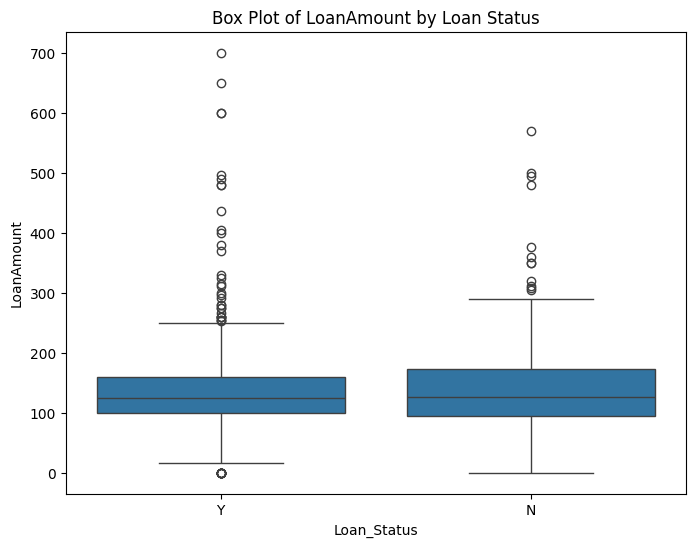

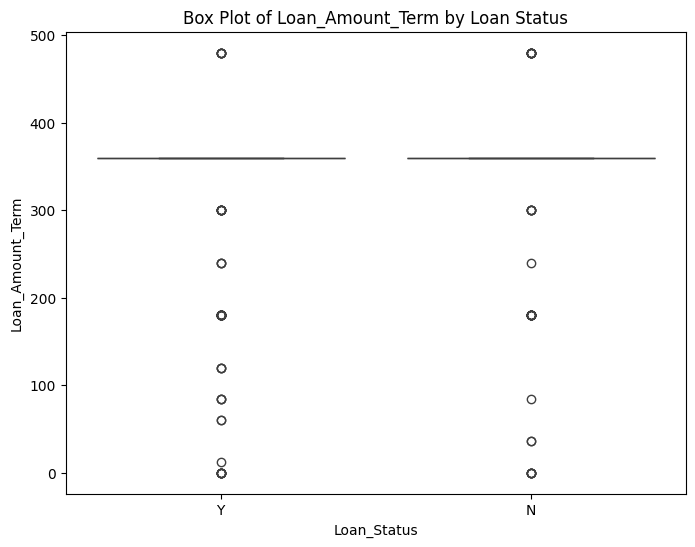

In [30]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Loan_Status', y=column, data=df)
    plt.title(f'Box Plot of {column} by Loan Status')
    plt.show()


## Visualization of correlation

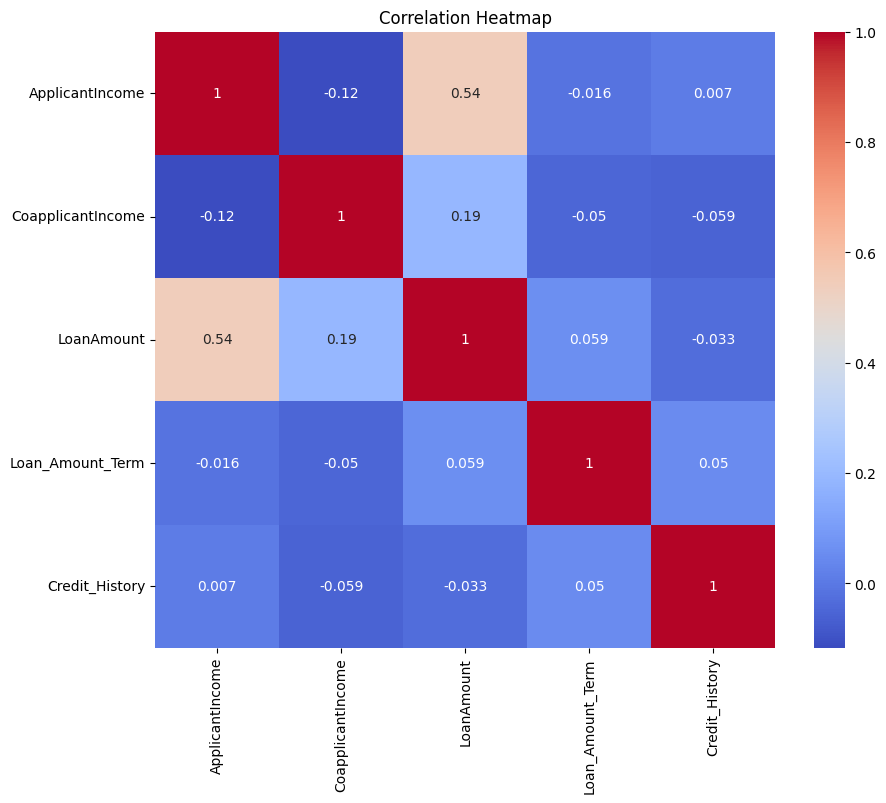

In [31]:

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


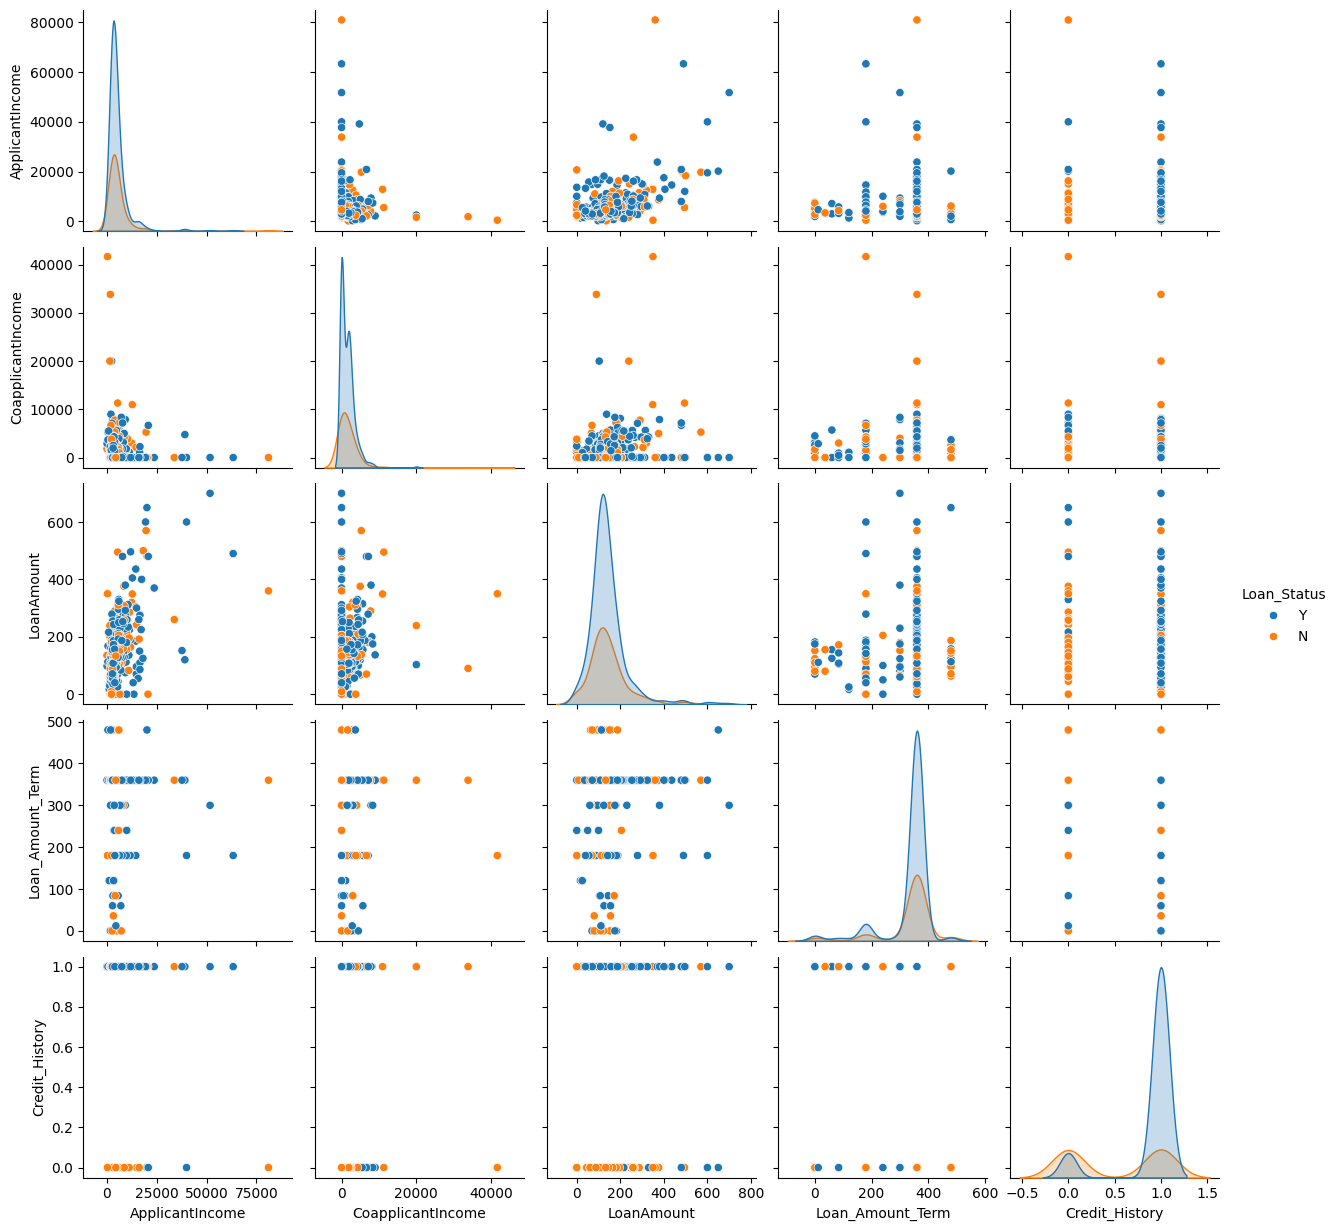

In [32]:
# pair plot
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.show()


These visualizations should provide us with insights into the distribution of variables, relationships between variables, and potential patterns in the data related to loan approval. 

### Model building

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Drop 'Loan_ID' as it is not needed for prediction
df = df.drop('Loan_ID', axis=1)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target variable (y)
X = df.drop('Loan_Status_Y', axis=1)  # Assuming 'Loan_Status_Y' is the encoded target variable
y = df['Loan_Status_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')



Model: Random Forest
Accuracy: 0.7317073170731707
Confusion Matrix:
[[17 26]
 [ 7 73]]
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.40      0.51        43
        True       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123


Model: Logistic Regression
Accuracy: 0.7398373983739838
Confusion Matrix:
[[16 27]
 [ 5 75]]
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.37      0.50        43
        True       0.74      0.94      0.82        80

    accuracy                           0.74       123
   macro avg       0.75      0.65      0.66       123
weighted avg       0.74      0.74      0.71       123


Model: Support Vector Machine
Accuracy: 0.6504065040650406
Confusion Matrix:
[[ 0 43]
 [ 0 80]]
Classification Report

c:\Users\english\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\english\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\english\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.


Model: Gradient Boosting
Accuracy: 0.7235772357723578
Confusion Matrix:
[[17 26]
 [ 8 72]]
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.40      0.50        43
        True       0.73      0.90      0.81        80

    accuracy                           0.72       123
   macro avg       0.71      0.65      0.65       123
weighted avg       0.72      0.72      0.70       123



Logistic Regression seems to perform slightly better based on the provided metrics. It has a good balance of precision, recall, and F1-score for the positive class.
Consider further hyperparameter tuning for Logistic Regression to potentially improve performance.